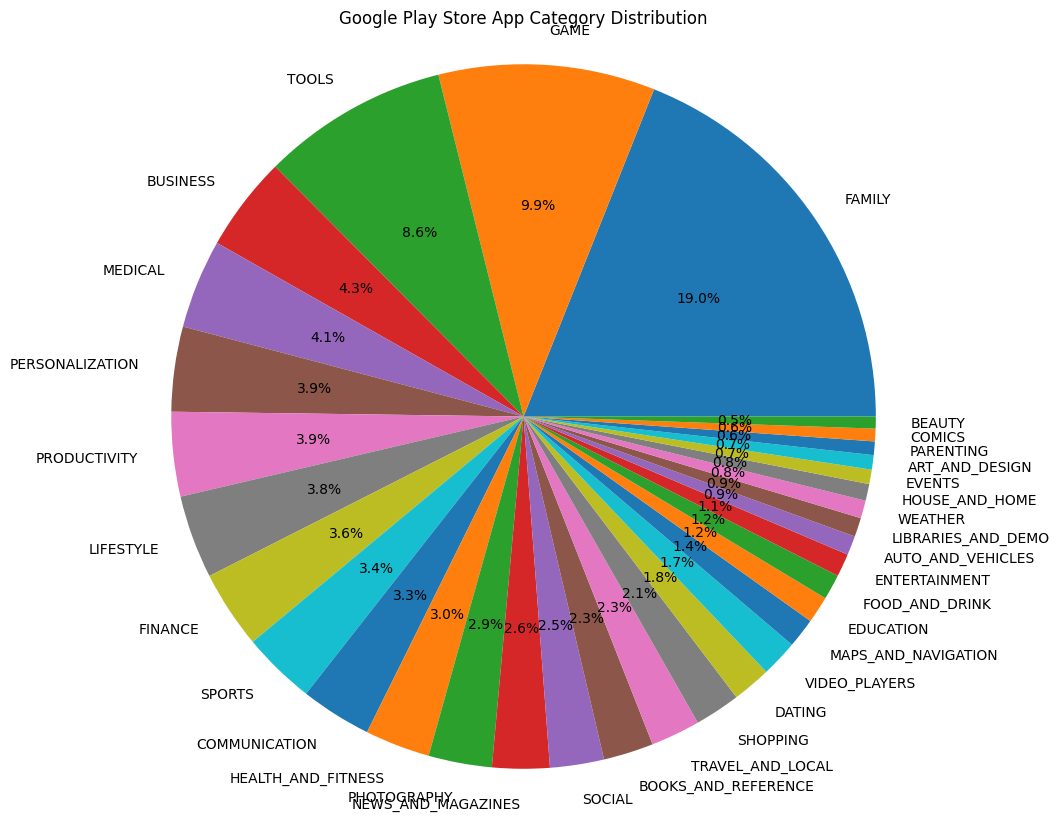

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv('google.csv')

# 计算每个应用程序类别的数量
category_count = df['category'].value_counts()

# 创建饼图
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(category_count, labels=category_count.index, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Google Play Store App Category Distribution')

# 显示图表
plt.show()


/tmp/ipykernel_1380/210224188.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['installs'] = df['installs'].astype(str).str.replace(',', '').str.replace('+', '').astype(int)


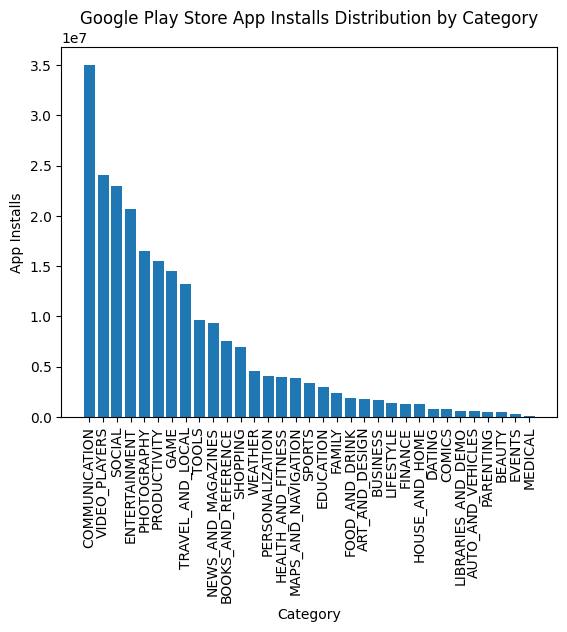

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv('google.csv')

# 删除特殊值“varies with device”和“free”
df = df[df['installs'] != 'varies with device']
df = df[df['installs'] != 'free']

# 转换“installs”列的数据类型
df['installs'] = df['installs'].astype(str).str.replace(',', '').str.replace('+', '').astype(int)

# 按类别分组并计算每个组的安装数的平均值
category_installs = df.groupby('category')['installs'].mean().sort_values(ascending=False)

# 创建柱状图
plt.bar(category_installs.index, category_installs.values)

# 添加标签和标题
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('App Installs')
plt.title('Google Play Store App Installs Distribution by Category')

# 显示图表
plt.show()


/tmp/ipykernel_1380/2441793860.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='reviews', data=df, ax=ax, ci=None)


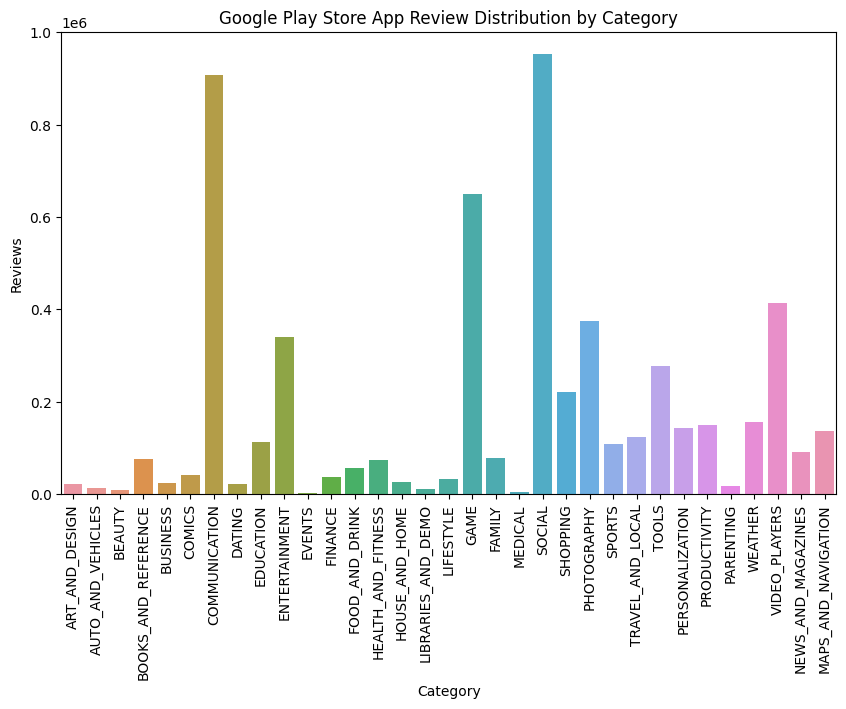

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv('google.csv')

# 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='category', y='reviews', data=df, ax=ax, ci=None)
plt.xticks(rotation=90)
ax.set_xlabel('Category')
ax.set_ylabel('Reviews')
ax.set_title('Google Play Store App Review Distribution by Category')

# 显示图表
plt.show()


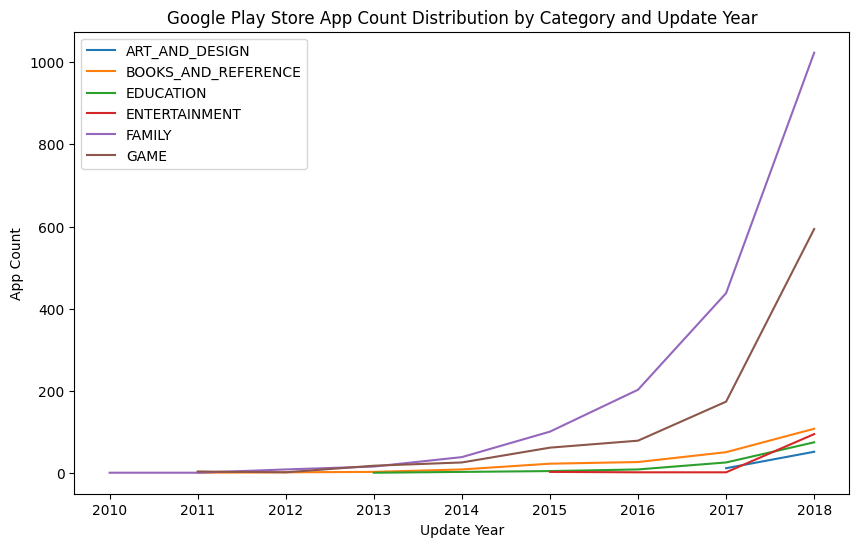

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv('google.csv')

# 将“update_year”列转换为整数类型
df['update_year'] = pd.to_numeric(df['update_year'], errors='coerce')

# 按照“update_year”和“category”分组，计算每个组中的行数
category_counts = df.groupby(['update_year', 'category']).size().reset_index(name='counts')

# 选择要绘制的类别
categories = ['ART_AND_DESIGN', 'BOOKS_AND_REFERENCE', 'EDUCATION', 'ENTERTAINMENT', 'FAMILY', 'GAME']

# 创建一个折线图
fig, ax = plt.subplots(figsize=(10, 6))

# 为每个类别绘制一条折线
for category in categories:
    data = category_counts[category_counts['category'] == category]
    ax.plot(data['update_year'], data['counts'], label=category)

# 添加图例和标题
ax.legend()
ax.set_xlabel('Update Year')
ax.set_ylabel('App Count')
ax.set_title('Google Play Store App Count Distribution by Category and Update Year')

# 显示图表
plt.show()
